'''
【课程1.5】  帕累托分析

帕累托分析（贡献度分析） → 帕累托法则：20/80定律

“原因和结果、投入和产出、努力和报酬之间本来存在着无法解释的不平衡。一般来说，投入和努力可以分为两种不同的类型：
多数，它们只能造成少许的影响；少数，它们造成主要的、重大的影响。”
→ 一个公司，80%利润来自于20%的畅销产品，而其他80%的产品只产生了20%的利润

例如：
** 世界上大约80％的资源是由世界上15％的人口所耗尽的
** 世界财富的80％为25％的人所拥有；在一个国家的医疗体系中
** 20％的人口与20％的疾病，会消耗80％的医疗资源。

一个思路：通过二八原则，去寻找关键的那20%决定性因素！

'''

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

A    3707.160318
B    3266.733652
C    3279.774861
D    3870.764881
E    3467.406912
F    3903.628892
G    3161.432021
H    3800.458032
I    3110.482154
J    3110.611692
dtype: float64
--------
超过80%的累计占比的节点值的索引为 G
超过80%的累计占比的节点值的索引位置为 7
核心产品为: F    3903.628892
D    3870.764881
H    3800.458032
A    3707.160318
E    3467.406912
C    3279.774861
B    3266.733652
G    3161.432021
dtype: float64


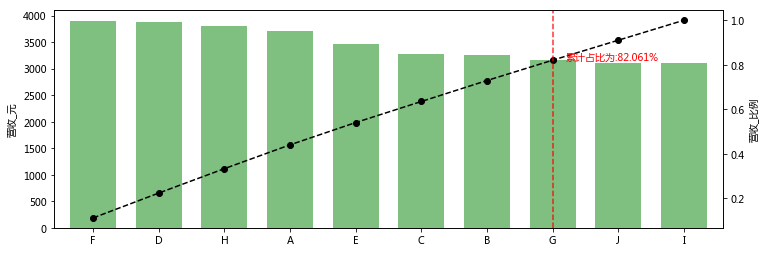

In [7]:
# 帕累托分布分析 

data = pd.Series(np.random.rand(10)*1200+3000,     # 创建数据，10个品类产品的销售额
                 index=list('ABCDEFGHIJ'))
print(data)
print('--------')

data.sort_values(ascending=False,inplace=True)     # 由大到小排列

plt.figure(figsize=(12,4))
data.plot(kind='bar',alpha=0.5,width=0.7,color='g') # 创建营收柱状图
plt.ylabel('营收_元')

p = data.cumsum()/data.sum()                       # 创建累计占比，Series
key = p[p>0.8].index[0]                            # 找到累计占比超过80%时候的index
key_num = data.index.tolist().index(key)           # 找到key所对应的索引位置
print('超过80%的累计占比的节点值的索引为',key)
print('超过80%的累计占比的节点值的索引位置为',key_num)

p.plot(style='--ko',secondary_y=True)                             # secondary_y → y副坐标轴
plt.axvline(key_num,hold=None,color='r',linestyle='--',alpha=0.8) # 绘制营收累计占比曲线
plt.text(key_num+0.2,p[key],'累计占比为:%.3f%%'%(p[key]*100),color='r')
plt.ylabel('营收_比例')

key_product = data.loc[:key]
print('核心产品为:',key_product)